# 전국 연령군 별 회복 속도
- 시각화 초점

In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation

# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.float_format', lambda x : '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 로드
avgAge = pd.read_csv('/content/province_avgAge.csv', encoding='CP949')
PatientInfo = pd.read_csv('/content/PatientInfo.csv')

### 회복기간 = 확진날짜 - 퇴원날짜

나이순으로 정렬하고 결측치를 제거한다.

released date의 결측치에는 사망자 등을 포함되었을 것으로 예상

In [ ]:
patient = PatientInfo[['province','confirmed_date','released_date']]
patient = patient.sort_values(by=["province"], ascending=[True] )
patient

,province,confirmed_date,released_date
926,Busan,2020-02-27,NaN
875,Busan,2020-02-22,NaN
876,Busan,2020-02-22,NaN
877,Busan,2020-02-22,NaN
878,Busan,2020-02-22,NaN
...,...,...,...
1400,Ulsan,2020-04-11,2020-04-20
1401,Ulsan,2020-03-07,2020-04-03
1402,Ulsan,2020-03-10,2020-03-19
1404,Ulsan,2020-03-12,2020-03-31


In [ ]:
patient = patient.dropna()
patient = patient.drop(patient[patient.province =='etc'].index)
patient = patient.reset_index(drop =True)
patient

,province,confirmed_date,released_date
0,Chungcheongbuk-do,2020-03-14,2020-04-02
1,Chungcheongbuk-do,2020-03-08,2020-03-21
2,Chungcheongbuk-do,2020-03-07,2020-03-26
3,Chungcheongbuk-do,2020-03-07,2020-03-26
4,Chungcheongbuk-do,2020-03-07,2020-03-30
...,...,...,...
1503,Ulsan,2020-04-11,2020-04-20
1504,Ulsan,2020-03-07,2020-04-03
1505,Ulsan,2020-03-10,2020-03-19
1506,Ulsan,2020-03-12,2020-03-31


confirmed_date 와 released_date 를 통해 회복 기간을 계산하기 위하여 '-'를 제거해주는 함수를 설정하고 각 열에 적용해 준다,

In [ ]:
def changestr(date):
    d = date.split('-')
    return ''.join(d)

In [ ]:
patient['str_confirmed_date'] = patient['confirmed_date'].apply(changestr)
patient['str_released_date'] = patient['released_date'].apply(changestr)

datetime 모듈을 불러오고 released_date에서 confirmed_date를 빼준다. 회복 기간(recovery periods)를 반환한다.

In [ ]:
from datetime import datetime

def interval_between_date(str_confirmed_date, str_released_date):
  
  recovery_periods = (datetime.strptime(str_released_date, '%Y%m%d').date() - datetime.strptime(str_confirmed_date, '%Y%m%d').date()).days
  return recovery_periods

In [ ]:
patient = patient.dropna()

In [ ]:
# str_confirmed_date = pd.DataFrame(patient.str_confirmed_date)
# str_confirmed_date

In [ ]:
# str_released_date = pd.DataFrame(patient.str_released_date)
# str_released_date

In [ ]:
a = []
for c, r in zip(patient.str_confirmed_date, patient.str_released_date):
    a.append(interval_between_date(c, r))
a = pd.DataFrame(a)
a.columns = ['recovery_periods']

In [ ]:
patient = patient.dropna()
patient = patient.drop(['str_confirmed_date', 'str_released_date'], axis=1)

recovery_periods를 표에 합쳐준다.

In [ ]:
patient['recovery_periods'] = a['recovery_periods']
patient

,province,confirmed_date,released_date,recovery_periods
0,Chungcheongbuk-do,2020-03-14,2020-04-02,19
1,Chungcheongbuk-do,2020-03-08,2020-03-21,13
2,Chungcheongbuk-do,2020-03-07,2020-03-26,19
3,Chungcheongbuk-do,2020-03-07,2020-03-26,19
4,Chungcheongbuk-do,2020-03-07,2020-03-30,23
...,...,...,...,...
1503,Ulsan,2020-04-11,2020-04-20,9
1504,Ulsan,2020-03-07,2020-04-03,27
1505,Ulsan,2020-03-10,2020-03-19,9
1506,Ulsan,2020-03-12,2020-03-31,19


지역을 기준으로 그룹화하고 각 지역의 회복기간의 평균을 계산한다.
이를 시각화한다.

In [ ]:
recovery = patient.groupby(['province'])['recovery_periods'].mean()
recovery = pd.DataFrame(recovery.apply(pd.to_numeric))
recovery = recovery.sort_values(by = 'province', ascending=True)
# recovery = recovery.drop(['100'])
recovery.reset_index(inplace = True)
recovery = recovery[['province', 'recovery_periods']]
# recovery = recovery.drop(['province'], axis=1, inplace=True )


recovery

,province,recovery_periods
0,Chungcheongbuk-do,21.26
1,Chungcheongnam-do,24.05
2,Daegu,9.00
3,Daejeon,23.74
4,Gangwon-do,19.89
5,Gwangju,20.54
6,Gyeonggi-do,16.66
7,Gyeongsangbuk-do,26.07
8,Gyeongsangnam-do,23.52
9,Incheon,23.41


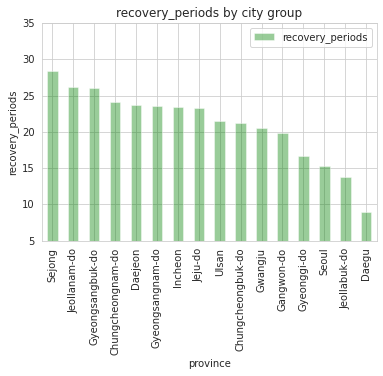

In [ ]:
recovery = recovery.sort_values('recovery_periods', ascending = False)
recovery.plot.bar(x = 'province', y = 'recovery_periods', color='green', alpha=0.4)
plt.title('recovery_periods by city group')

plt.ylim(5, 35)  # y축의 최솟값과 최댓값 지정
plt.ylabel('recovery_periods')
plt.legend()
plt.show()

## 지역 별 회복 기간 시각화 -지도편
- folium

In [ ]:
import folium

json을 불러와, 서울시 구별 데이터 뿌려주기

In [ ]:
import json

### 회복률 지도

In [ ]:
recovery = patient.groupby(['province'])['recovery_periods'].mean()
recovery = pd.DataFrame(recovery.apply(pd.to_numeric))
recovery = recovery.sort_values(by = 'province', ascending=True)
# recovery = recovery.drop(['100'])
recovery.reset_index(inplace = True)
recovery = recovery[['province', 'recovery_periods']]
# recovery = recovery.drop(['city'], axis=1, inplace=True )


recovery

,province,recovery_periods
0,Chungcheongbuk-do,21.26
1,Chungcheongnam-do,24.05
2,Daegu,9.00
3,Daejeon,23.74
4,Gangwon-do,19.89
5,Gwangju,20.54
6,Gyeonggi-do,16.66
7,Gyeongsangbuk-do,26.07
8,Gyeongsangnam-do,23.52
9,Incheon,23.41


In [ ]:
with open('/content/skorea_provinces_geo.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=11,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=recovery,
               columns=['province','recovery_periods'],
               key_on='feature.properties.name_eng',
               fill_color='PuRd',
               legend_name = 'recovery_periods')
map1

### 구별 확진자 수

In [ ]:
province_confirmed_number = PatientInfo[['province', 'patient_id']]
province_confirmed_number

,province,patient_id
0,Seoul,1000000001
1,Seoul,1000000002
2,Seoul,1000000003
3,Seoul,1000000004
4,Seoul,1000000005
...,...,...
3999,Jeju-do,7000000010
4000,Jeju-do,7000000011
4001,Jeju-do,7000000012
4002,Jeju-do,7000000013


In [ ]:
province_confirmed_number = province_confirmed_number.dropna()
province_confirmed_number = province_confirmed_number.drop(province_confirmed_number[province_confirmed_number.province=='etc'].index)
province_confirmed_number = province_confirmed_number.reset_index(drop =True)
province_confirmed_number

,province,patient_id
0,Seoul,1000000001
1,Seoul,1000000002
2,Seoul,1000000003
3,Seoul,1000000004
4,Seoul,1000000005
...,...,...
3999,Jeju-do,7000000010
4000,Jeju-do,7000000011
4001,Jeju-do,7000000012
4002,Jeju-do,7000000013


In [ ]:
c = pd.DataFrame(province_confirmed_number.groupby(['province'])['patient_id'].count())
c = c.rename(columns = {'patient_id' : 'count'})
c.reset_index(inplace = True)
c = c[['province', 'count']]
c

,province,count
0,Busan,144
1,Chungcheongbuk-do,52
2,Chungcheongnam-do,146
3,Daegu,63
4,Daejeon,46
5,Gangwon-do,55
6,Gwangju,30
7,Gyeonggi-do,853
8,Gyeongsangbuk-do,1245
9,Gyeongsangnam-do,122


In [ ]:
with open('/content/skorea_provinces_geo.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=11,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=c,
               columns=['province','count'],
               key_on='feature.properties.name_eng',
               fill_color='PuRd',
               legend_name = 'count')
map1

### 서울 지역별 연령 분포

In [ ]:
avgAge = avgAge.loc[2:27]

In [ ]:
avgAge['province'] = avgAge['province'].str.replace('서울특별시 ','').replace(' ')
avgAge['province'] = avgAge['province'].str.split(" ")
avgAge['province'] = avgAge['province'].str[0]
avgAge = avgAge.reset_index(drop = 'index')
avgAge

,province,avgAge
0,강원도,"1,540,689"
1,충청북도,"1,598,162"
2,충청남도,"2,120,519"
3,전라북도,"1,807,094"
4,전라남도,"1,851,985"
5,경상북도,"2,640,932"
6,경상남도,"3,345,169"
7,제주특별자치도,"672,524"


In [ ]:
with open('/content/skorea_provinces_geo.json', 'r',encoding='utf-8') as f:
    data = json.load(f)

map1 = folium.Map(location=[37.565,126.986],zoom_start=11,tiles='OpenStreetMap')
map1.choropleth(geo_data = data, data=avgAge,
               columns=['province','avgAge'],
               key_on='feature.properties.name',
               fill_color='PuRd',
               legend_name = 'avgAge')
map1

## t-검정

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
# t-검정 계산
t, p = stats.ttest_ind(province, recovery_periods)
print("t = " + str(t))
print("p = " + str(p))

In [ ]:
recovery = recovery[['province', 'recovery_periods']]
df_joined = recovery.merge(avgAge)
recovery